**Лекция 9**

# Обусловленность СЛАУ

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Суть-проблемы" data-toc-modified-id="Суть-проблемы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Суть проблемы</a></span></li><li><span><a href="#Обусловленность" data-toc-modified-id="Обусловленность-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обусловленность</a></span><ul class="toc-item"><li><span><a href="#Число-обусловленности" data-toc-modified-id="Число-обусловленности-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Число обусловленности</a></span></li><li><span><a href="#Геометрическая-интерпретация" data-toc-modified-id="Геометрическая-интерпретация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Геометрическая интерпретация</a></span></li></ul></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Генерация-данных" data-toc-modified-id="Генерация-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Генерация данных</a></span></li><li><span><a href="#Поиск-коэффициентов-регрессии" data-toc-modified-id="Поиск-коэффициентов-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск коэффициентов регрессии</a></span></li><li><span><a href="#Сингулярное-разложение" data-toc-modified-id="Сингулярное-разложение-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сингулярное разложение</a></span></li></ul></li><li><span><a href="#Проблема-мультиколлинеарности" data-toc-modified-id="Проблема-мультиколлинеарности-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проблема мультиколлинеарности</a></span><ul class="toc-item"><li><span><a href="#Метод-главных-компонент" data-toc-modified-id="Метод-главных-компонент-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Метод главных компонент</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

import sys
sys.path.append('../modules')
import graph_support

In [2]:
# Styles
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 6
cm = plt.cm.tab10  # Colormap
scale = 2

import seaborn
seaborn.set_style('whitegrid')

In [3]:
%%html
<style>
    .container.slides .celltoolbar, .container.slides .hide-in-slideshow {display: None ! important;}
</style>

---

## Суть проблемы ##

Пусть дана исходная система линейных уравнений
$$ A \mathbf{x} = \mathbf{b}, $$
где $A$ &mdash; квадратная невырожденная матрица порядка $n$.

В этом случае система имеет единственное решение $\mathbf{x} = A^{-1} \mathbf{b}$.

Решение системы линейных уравнений можно интерпретировать, как разложение вектора $\mathbf{b}$ по вектор-столбцам матрицы $A$.

Рассмотрим матрицу
$$
  A = 
  \begin{pmatrix}
    1.0 & 1.0 \\
    1.0 & 1.2
  \end{pmatrix}.
$$

Её столбцы, практически, коллинеарны.
Из общих соображений понятно, что выбирать эти столбцы в качестве базисных &mdash; плохая идея.
Разложение любого вектора по таким столбцам может привести к ошибкам.

In [4]:
A = np.array([[1.0, 1.0],
              [1.0, 1.2]])

origin = [[0,0], [0,0]] # origin point

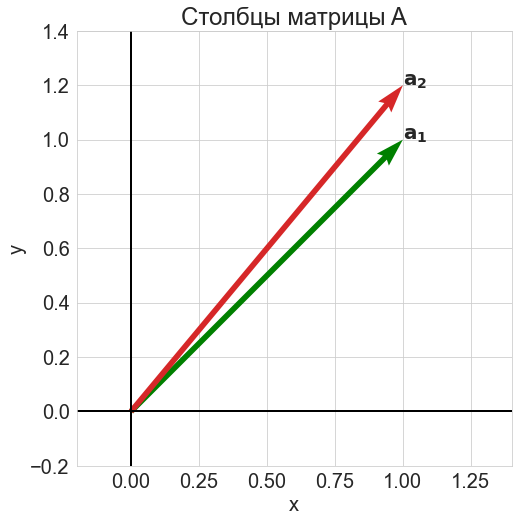

In [5]:
graph_support.hide_code_in_slideshow()

fig, ax1 = plt.subplots(1, 1, figsize=(scale*4, scale*4))
plt.subplots_adjust(wspace=0.4)

# Plotting y1
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.quiver(*origin, A[0,:], A[1,:], color=['g', cm(3)],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([-0.2, 1.4])
ax1.set_ylim([-0.2, 1.4])
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.set_title("Столбцы матрицы A")
ax1.text(*A[:,0], "$\mathbf{a_1}$")
ax1.text(*A[:,1], "$\mathbf{a_2}$")

plt.show()

Посмотрим, как появляются эти ошибки.

Пусть вектор $\mathbf{b}$ известен не точно, а с некоторой погрешностью.
Посмотрим, какова будет погрешность решения системы &mdash; вектора $\mathbf{x}$.

> Здесь и далее на рисунках вектор правых частей изображается на *правом* рисунке (&laquo;После преобразования&raquo;), а вектор решения &mdash; на *левом* (&laquo;До преобразования&raquo;).

In [6]:
# Creating vector b and solve system
# Solution
# alpha = np.radians(48)
alpha = np.radians(45)
b0 = np.atleast_2d([np.cos(alpha), np.sin(alpha)]).T
print(b0)
A_inv = LA.inv(A)
x0 = A_inv @ b0

[[0.70710678]
 [0.70710678]]


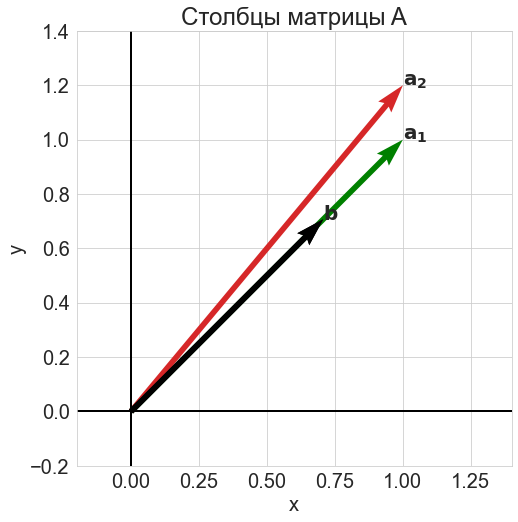

In [7]:
graph_support.hide_code_in_slideshow()

fig, ax1 = plt.subplots(1, 1, figsize=(scale*4, scale*4))
plt.subplots_adjust(wspace=0.4)

# Plotting y1
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.quiver(*origin, A[0,:], A[1,:], color=['g', cm(3)],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, b0[0,:], b0[1,:], color=['k'],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([-0.2, 1.4])
ax1.set_ylim([-0.2, 1.4])
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.set_title("Столбцы матрицы A")
ax1.text(*A[:,0], "$\mathbf{a_1}$")
ax1.text(*A[:,1], "$\mathbf{a_2}$")
ax1.text(*b0, "$\mathbf{b}$")

plt.show()

In [8]:
# Creating perturbed vectors B and solve system
# Noise
n = 100
np.random.seed(42)
r = 0.1*np.random.rand(n)
phi = 2*np.pi*np.random.rand(n)
B1 = b0[0] + r*np.cos(phi)
B2 = b0[1] + r*np.sin(phi)
B = np.vstack((B1, B2))
X = A_inv @ B

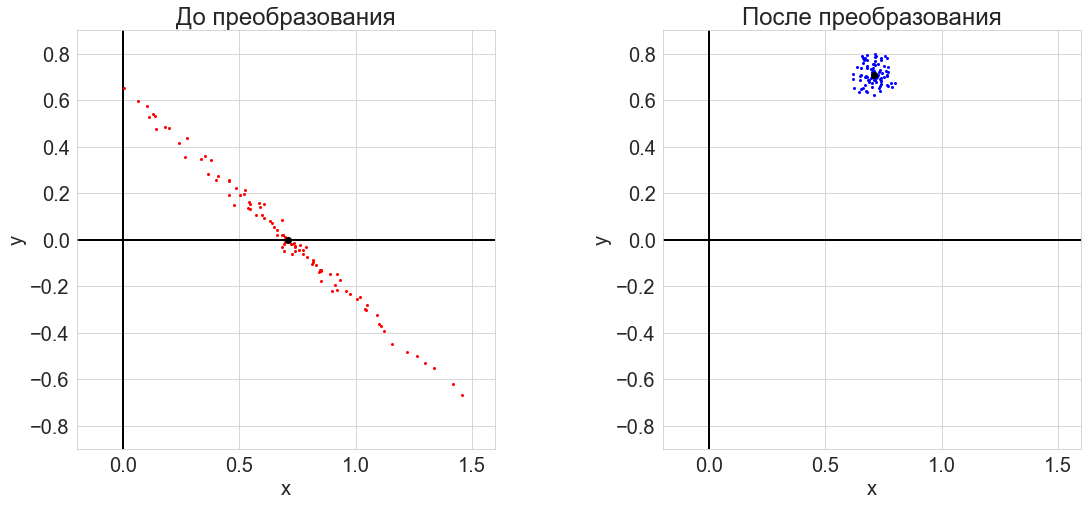

In [9]:
graph_support.hide_code_in_slideshow()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.2, 1.6]
ylims = [-0.9, 0.9]

# Plotting X
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.plot(X[0,:], X[1,:], 'o', ms=2., color='r')
ax1.plot(x0[0], x0[1], 'o', color='k')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.set_title("До преобразования")

# Plotting Y
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.plot(B[0, :], B[1, :], 'o', ms=2., color='b')
ax2.plot(b0[0], b0[1], 'o', color='k')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.set_aspect('equal')
ax2.set_axisbelow(True)
ax2.set_title("После преобразования")

plt.show()

In [10]:
# x_sol = np.array([1.0, 0.0]).T
dx = X - x0
db = B - b0

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b0)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x0)

print('Максимальное относительное увеличение возмущения max(dx/x : db/b) = ', round(max(k2/k1), 4))

Максимальное относительное увеличение возмущения max(dx/x : db/b) =  14.8803


Мы видим, что небольшое возмущение вектора правой части $\mathbf{b}$ привела к гораздо большим (почти в 15 раз) возмущениям вектора решений $\mathbf{x}$.
В таком случае говорят, что система уравнений является *плохо обусловленной*.
Разберёмся подробнее, что это значит.

---

## Обусловленность ##

### Число обусловленности ###

Рассмотрим возмущённую систему
$$ A \tilde{\mathbf{x}} = \mathbf{b} + \delta\mathbf{b}. $$

Введём вектор возмущения решения $\delta \mathbf{x} = \tilde{\mathbf{x}} - \mathbf{x}$.

Выразим $\mathbf{x}$ и $\delta\mathbf{x}$ через обратную матрицу $A^{-1}$:
$$ \delta \mathbf{x} = A^{-1}(\mathbf{b} + \delta\mathbf{b}) - A^{-1}\mathbf{b} = A^{-1}\delta\mathbf{b}. $$

Перейдём к оценке нормы возмущения:
$$ \|\delta \mathbf{x}\| = \|A^{-1} \delta \mathbf{b}\| \le \|A^{-1}\| \cdot \|\delta \mathbf{b}\|. $$

Учитывая, что $\|\mathbf{b}\| \le \|A\| \cdot \|\mathbf{x}\|$, усилим неравенство, умножив правую часть на $\|A\| \cdot \dfrac{\|\mathbf{x}\|}{\|\mathbf{b}\|}$:
$$ \|\delta \mathbf{x}\| \le \|A^{-1}\| \|A\| \|\mathbf{x}\| \frac{\|\delta \mathbf{b}\|}{\|\mathbf{b}\|}. $$

Наконец, разделим на $\|\mathbf{x}\|$:
$$ \frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \le \|A^{-1}\| \|A\| \frac{\|\delta \mathbf{b}\|}{\|\mathbf{b}\|}. $$

**Определение.** \
Величина $\mu(A) = \|A^{-1}\| \|A\|$ называется *числом обусловленности* матрицы $A$ в рассматриваемой норме. Она показывает, во сколько раз может возрасти относительная погрешность решения по сравнению с относительной погрешностью правой части.

**Спектральное число обусловленности.** \
Согласно формуле для спектральной нормы матрицы
$$ \mu(A) = \dfrac{\sigma_1}{\sigma_n}, $$
где $\sigma_1$ и $\sigma_n$ &mdash; максимальное и минимальное сингулярные числа матрицы $A$.

In [11]:
U, sgm, Vt = LA.svd(A)
mu = sgm[0]/sgm[1]
print('sigma = ', np.round(sgm, 3))
print('mu(A) = ', round(mu, 2))

sigma =  [2.105 0.095]
mu(A) =  22.15


In [12]:
mu_2 = 1 / sgm[1] / LA.norm(x0)
print(mu_2)

14.884509794827975


In [13]:
print(LA.norm(x0))
print(1/sgm[1] * LA.norm(b0))

0.707106781186547
10.524937810560441


### Геометрическая интерпретация ###

Дадим геометрическую интерпретацию числа обусловленности.

In [14]:
# Creating the vectors for a circle and storing them in x
b0 = np.array([2**-0.5, 2**-0.5]).T
r_b = 0.1 * LA.norm(b0)
phi = np.linspace(0, 2*np.pi, 100)
B1 = b0[0] + r_b*np.cos(phi)
B2 = b0[1] + r_b*np.sin(phi)
Bc = np.vstack((B1, B2))

#
A_inv = LA.inv(A)
x0 = A_inv @ b0
Xc = A_inv @ Bc

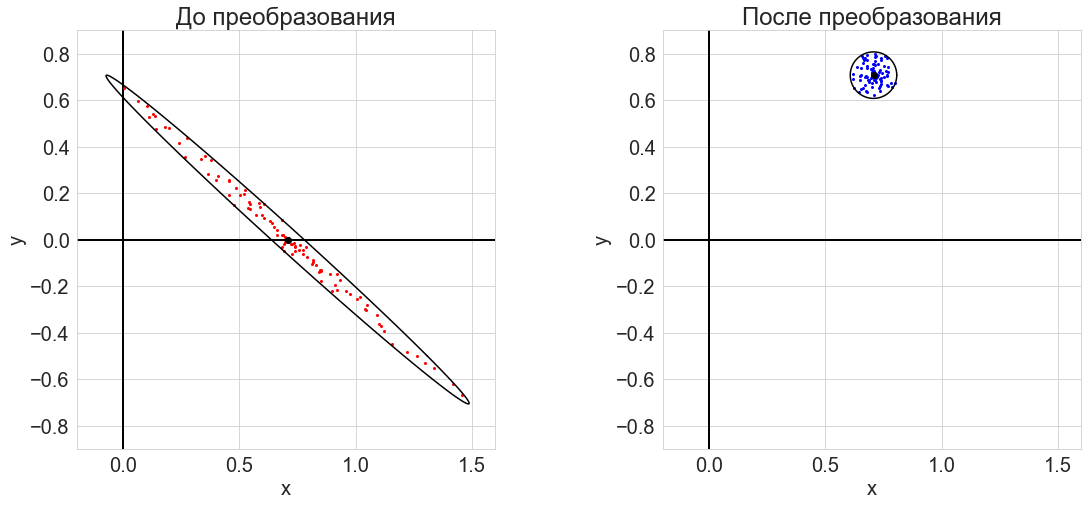

In [15]:
graph_support.hide_code_in_slideshow()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.2, 1.6]
ylims = [-0.9, 0.9]

# Plotting X
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.plot(X[0,:], X[1,:], 'o', ms=2., c='r')
ax1.plot(Xc[0,:], Xc[1,:], lw=1.5, c='k')
ax1.plot(x0[0], x0[1], 'o', c='k')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.set_title("До преобразования")

# Plotting Y
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.plot(B[0,:], B[1,:], 'o', ms=2., c='b')
ax2.plot(Bc[0, :], Bc[1, :], lw=1.5, c='k')
ax2.plot(b0[0], b0[1], 'o', c='k')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.set_aspect('equal')
ax2.set_axisbelow(True)
ax2.set_title("После преобразования")

plt.show()

Для двумерного случая мы видим, что если векторы правой части возмущённой системы лежат внутри окружности, то решения возмущённой системы лежат внутри эллипса, являющегося прообразом этой окружности.
Причём отношение полуосей этого эллипса равно *спектральному числу обусловленности*.

**Самостоятельно.**

1. Проблема в том, что мы пытаемся разложить вектор $\mathbf{b}$ по базису, векторы которого почти коллинеарны. \
Тогда почему бы нам не попытаться ортогонализовать наш базис, применив, например, $QR$-разложение?

1. В нашем примере число обусловленности $\mu(A)=22.15$. Но выше мы нашли, что относительная погрешность увеличилась в $14.88$ раз. Почему так произошло? При каком условии оценка, сделанная по числу обусловленности, будет достигаться? \
Как, выбрав вектор $\mathbf{b}$, сделать для него более точную оценку возрастания относительной погрешности?

---

## Линейная регрессия ##

### Генерация данных ###

In [16]:
def pol(a, x):
    return np.sum([a[i]*x**i for i in range(len(a))], axis=0)

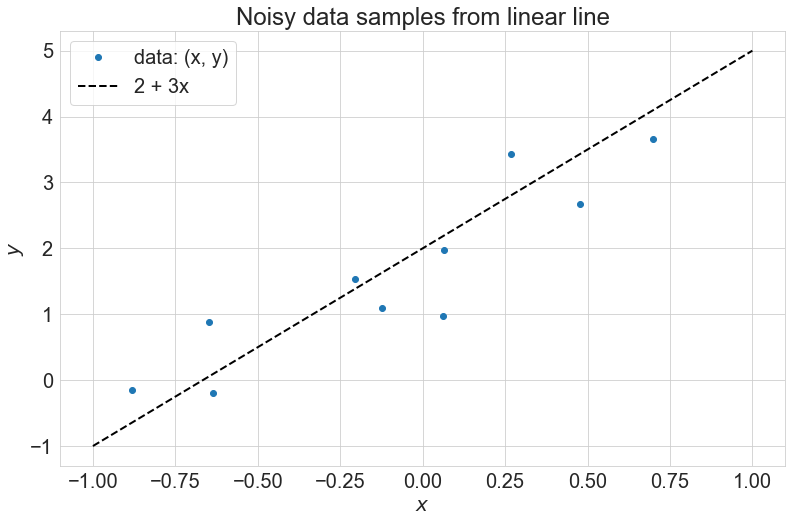

In [17]:
graph_support.hide_code_in_slideshow()

# Define the data
np.random.seed(123)
Ns = 10 # Number of samples
x_lim = np.array([-1, 1])

# Underlying functional relation
fun = pol
a = [2, 3]
label = f'{a[0]} + {a[1]}x'

# Noise
e_std = 0.5  # Standard deviation of the noise
err = e_std * np.random.randn(Ns)  # Noise

# Features and output
x = np.random.uniform(x_lim[0], x_lim[1], Ns)  # Independent variable x
y = fun(a, x) + err  # Dependent variable

# Show data
X = np.linspace(x_lim[0], x_lim[1], 100)
plt.figure(figsize=(13, 8))
plt.title('Noisy data samples from linear line')
plt.plot(x, y, 'o', label='data: (x, y)')
plt.plot(X, fun(a, X), 'k--', label=label)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

### Поиск коэффициентов регрессии ###

In [18]:
# The number of fetures
Nf = 7
# Stack X with ones to be fitted by OLS
F = np.ones_like(x)
for i in range(1, Nf):
    F = np.vstack((F, x**i))
F = F.T
    
# Fit parameters with OLS
Alpha = np.linalg.inv(F.T @ F) @ F.T @ y

# Function representing fitted line
f = lambda x: sum([Alpha[i]*x**i for i in range(Nf)])

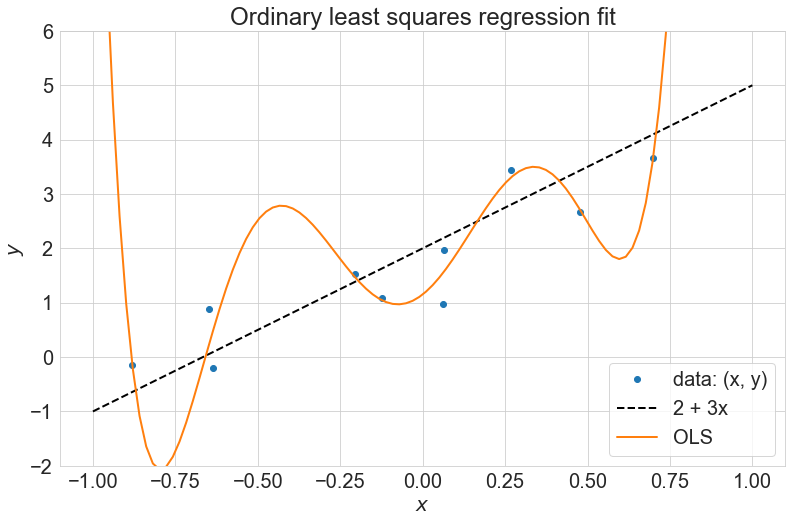

In [19]:
graph_support.hide_code_in_slideshow()

# Show OLS fitted line
plt.figure(figsize=(13, 8))
plt.title('Ordinary least squares regression fit')
plt.plot(x, y, 'o', label='data: (x, y)')
plt.plot(X, fun(a, X), 'k--', label=label)
plt.plot(X, f(X), '-', label='OLS')
plt.legend(loc='lower right')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-2, 6)
plt.show()

### Сингулярное разложение ###

Рассмотрим матрицу $F$ размерностью $m \times n$.
Для определённости будем считать, что строк не меньше чем столбцов и столбцы линейно независимы, т.е. $n \le m$ и $\mathrm{Rg}F = n$.

Представим матрицу $F$ в виде сингулярного разложения 
$$ F = U \Sigma V^\top. $$

Имея сингулярное разложение, легко записать

 - псевдообратную матрицу:
$$ F^{+} = (F^\top F)^{-1}F^\top = (V \Sigma U^\top U \Sigma V^\top)^{-1} \cdot V \Sigma U^\top = V \Sigma^{-1}U^\top = \sum_{j=1}^n \frac{1}{{\sigma_j} }v_j u_j^\top;  \label{eq:psevdo}\tag{1} $$
 
 - вектор МНК-решения:
$$ \alpha^* = F^{+} y  = V \Sigma^{-1}U^\top y = \sum_{j=1}^n \frac{1}{{\sigma_j}}v_j (u_j^\top y);  \label{eq:alpha-res}\tag{2} $$
 
 - вектор $F\alpha^*$ &mdash; МНК-аппроксимацию целевого вектора $y$:
$$ F\alpha^* = P_F y = FF^{+}y = U \Sigma V^\top \cdot V \Sigma^{-1}U^\top y = UU^\top y = \sum_{j=1}^n u_j (u_j^\top y);  \label{eq:F-alpha-res}\tag{3} $$
 
 - норму вектора коэффициентов:
$$ \Vert \alpha^* \Vert^2 = y^\top U \Sigma^{-1}V^\top \cdot V \Sigma^{-1}U^\top y = y^\top U \Sigma^{-2}U^\top y = \sum_{j=1}^n \frac{1}{\sigma_j^2} (u_j^\top y)^2.  \label{eq:alpha-res-norm}\tag{4} $$

---

## Проблема мультиколлинеарности ##

Матрица \(K\) плохо обусловлена (матрица считается плохо обусловленной, если $\mu(K) \gtrsim 10^2 \div 10^4$).
Обращение такой матрицы численно неустойчиво.
При умножении обратной матрицы на вектор относительная погрешность усиливается в $\mu(K)$ раз.

Именно это и происходит с МНК-решением в случае плохой обусловленности.
Близкие к нулю собственные значения оказываются в знаменателе, в результате увеличивается разброс коэффициентов $\alpha^*$, появляются большие по абсолютной величине положительные и отрицательные коэффициенты.
МНК-решение становится неустойчивым &mdash; малые погрешности измерения признаков или ответов
у обучающих объектов могут существенно повлиять на вектор решения $\alpha^*$, а погрешности измерения признаков у тестового объекта $x$ &mdash; на значения функции регрессии $g(x, \alpha^*)$.
Мультиколлинеарность влечёт не только неустойчивость и переобучение, но и неинтерпретируемость коэффициентов, так как по абсолютной величине коэффициента $\alpha_j$ становится невозможно судить о степени важности признака $f_j$.

Если ковариационная матрица $K = F^\top F$ имеет неполный ранг, то её обращение невозможно.
Тогда приходится отбрасывать линейно зависимые признаки или применять описанные ниже методы &mdash; регуляризацию или метод главных компонент.
На практике чаще встречается проблема *мультиколлинеарности* &mdash; когда матрица $K$ имеет полный ранг, но близка к некоторой матрице неполного ранга.
Тогда говорят, что $K$ &mdash; матрица неполного псевдоранга или что она плохо обусловлена.
Геометрически это означает, что объекты выборки сосредоточены вблизи линейного подпространства меньшей размерности $m < n$.
Признаком мультиколлинеарности является наличие у матрицы $K$ собственных значений, близких к нулю.

Итак, матрица \(K\) плохо обусловлена (матрица считается плохо обусловленной, если $\mu(K) \gtrsim 10^2 \div 10^4$).
Обращение такой матрицы численно неустойчиво.
При умножении обратной матрицы на вектор относительная погрешность усиливается в $\mu(K)$ раз.

Именно это и происходит с МНК-решением в случае плохой обусловленности.
В формуле ([4](#mjx-eqn-eq:alpha-res-norm)) близкие к нулю собственные значения оказываются в знаменателе, в результате увеличивается разброс коэффициентов $\alpha^*$, появляются большие по абсолютной величине положительные и отрицательные коэффициенты.
МНК-решение становится неустойчивым &mdash; малые погрешности измерения признаков или ответов
у обучающих объектов могут существенно повлиять на вектор решения $\alpha^*$, а погрешности измерения признаков у тестового объекта $x$ &mdash; на значения функции регрессии $g(x, \alpha^*)$.
Мультиколлинеарность влечёт не только неустойчивость и переобучение, но и неинтерпретируемость коэффициентов, так как по абсолютной величине коэффициента $\alpha_j$ становится невозможно судить о степени важности признака $f_j$.

Отметим, что проблема мультиколленеарности никак не проявляется на обучающих данных: вектор $F\alpha^*$ не зависит от собственных значений $\sigma$ (см. формулу ([3](#mjx-eqn-eq:F-alpha-res))).

Убедимся в этом для нашего примера.

In [20]:
print('Вектор коэффициентов: ', Alpha)
print('Его норма: ', LA.norm(Alpha))

print('\nВектор МНК-аппроксимации: ', F @ Alpha)
print('Его норма: ', LA.norm(F @ Alpha))

Вектор коэффициентов:  [   1.15220094    4.77921315   29.39798055  -36.1272129  -134.75066819
   67.44024456  154.82651278]
Его норма:  221.0673278458537

Вектор МНК-аппроксимации:  [ 1.04370418 -0.13226055  1.46072413  2.72297247  0.49983464  0.20491863
  1.55970679  1.56409275  3.3088813   3.65651512]
Его норма:  6.3359925302451


Мы рассмотрим три метода решения проблемы мультиколлинеарности:

1. метод главных компонент,
1. гребневая регрессия,
1. метод LASSO.

### Метод главных компонент ###

Сделаем сингулярное разложение матрицы $F$. \
Посмотрим на набор её сингулярных чисел и число обусловленности.

In [21]:
U, sgm, Vt = np.linalg.svd(F, full_matrices=False)
V = Vt.T
print('Сингулярные числа: ', sgm)

mu = (sgm[0]/sgm[-1])
print('Число обусловленности mu = ', mu)

Сингулярные числа:  [3.35347844 1.83764121 0.84631111 0.34807406 0.13585743 0.02843847
 0.00497056]
Число обусловленности mu =  674.667900393541


Из всего спектра оставим $k$ главных компонент.
Для этого в формуле ([3](#mjx-eqn-eq:eq:alpha-res)) ограничим сумму $k$ слагаемыми.

Получим новый вектор коэффициентов, посмотрим на его норму.

In [22]:
k = 3
# Fit parameters with SVD
Alpha_svd = sum([1/sgm[i] * V[:,i] * (U.T[i] @ y) for i in range(k)])

# Function representing fitted line
f_svd = lambda x: sum([Alpha_svd[i]*x**i for i in range(Nf)])

In [23]:
print('Вектор коэффициентов: ', Alpha_svd)
print('Норма вектора коэффициентов: ', LA.norm(Alpha_svd))

Вектор коэффициентов:  [1.66759296 2.06378776 0.61322275 0.80793846 0.26252613 0.3592163
 0.12147734]
Норма вектора коэффициентов:  2.8777779581638403


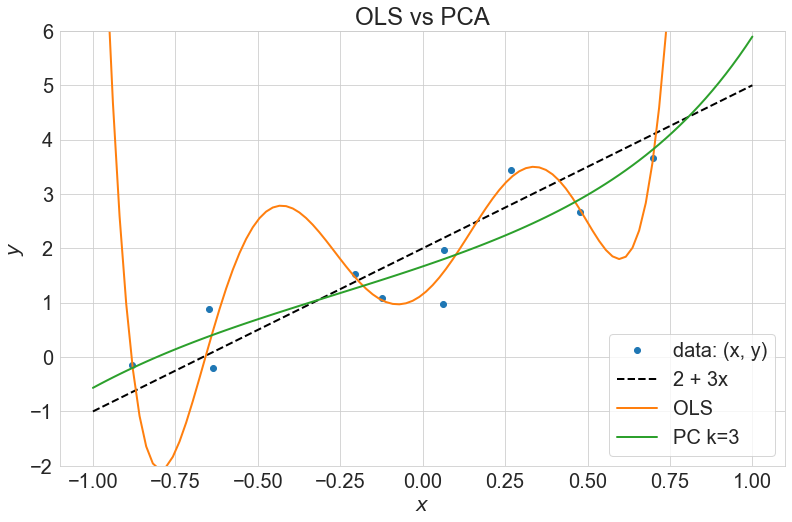

In [24]:
graph_support.hide_code_in_slideshow()

# Show OLS fitted line
plt.figure(figsize=(13, 8))
plt.title('OLS vs PCA')
plt.plot(x, y, 'o', label='data: (x, y)')
plt.plot(X, fun(a, X), 'k--', label=label)
plt.plot(X, f(X), '-', label='OLS')
plt.plot(X, f_svd(X), '-', label=f'PC k={k}')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-2, 6)
plt.show()

Мы видим, что больших коэффициентов регрессии больше нет, норма вектора коэффициентов уменьшилась почти в 100 раз.
При этом отметим, что порядок регрессионного полинома не уменьшился, уменьшились коэффициенты при старших членах.
Это означает, что применяя метод главных компонент, мы не избавляемся от менее значимых признаков, а просто уменьшаем их коэффициент в уравнении регрессии.

---

## Источники ##

1. *Беклемишев Д.В.* Дополнительные главы линейной алгебры. &mdash; М.: Наука, 1983. &mdash; 336 с.
1. *Воронцов К.В.* [Математические методы обучения по прецедентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.

In [25]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
# print('scipy: {}'.format(sp.__version__))

Python: 3.7.11
numpy: 1.21.2
matplotlib: 3.4.2
seaborn: 0.11.2
